In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the dataset from a CSV file
mcdonalds = pd.read_csv(r'C:\Users\srilekhach\Documents\McDonalds Case Study-20240407T082614Z-001\McDonalds Case Study\mcdonalds.csv ')

# Display the column names
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

 

In [3]:
mcdonalds = pd.read_csv(r'C:\Users\srilekhach\Documents\McDonalds Case Study-20240407T082614Z-001\McDonalds Case Study\mcdonalds.csv ')
mcdonalds 

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [115]:
# to check the variables
mcdonalds.columns


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n', 'cluster_labels',
       'VisitFrequencyNumeric'],
      dtype='object')

In [114]:
# to check the dimensions
mcdonalds.shape

(1453, 18)

In [7]:

# Display first few rows of the dataset
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [8]:
# Select the first eleven columns containing segmentation variables
MD_x = mcdonalds.iloc[:, 0:11]
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [9]:
# Convert categorical values ("Yes" and "No") to binary numeric format
MD_x = (MD_x == "Yes").astype(int)
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [10]:
# Round and calculate the column-wise means (proportions of "Yes")
round(MD_x.mean(), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [11]:
 
# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(MD_x)

# Display the summary
print("Standard deviation:\n", pca.explained_variance_)
print("\nProportion of Variance:\n", pca.explained_variance_ratio_)
print("\nCumulative Proportion:\n", pca.explained_variance_ratio_.cumsum())


Standard deviation:
 [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of Variance:
 [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Proportion:
 [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [12]:
# Get standard deviations (square roots of eigenvalues)
std_devs = np.sqrt(pca.explained_variance_)

# Get factor loadings (rotation matrix)
loadings = pca.components_

# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(std_devs.round(1))

# Print rotation matrix (factor loadings)
print("Rotation (n x k) = (11 x 11):")
print(loadings.round(1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) = (11 x 11):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


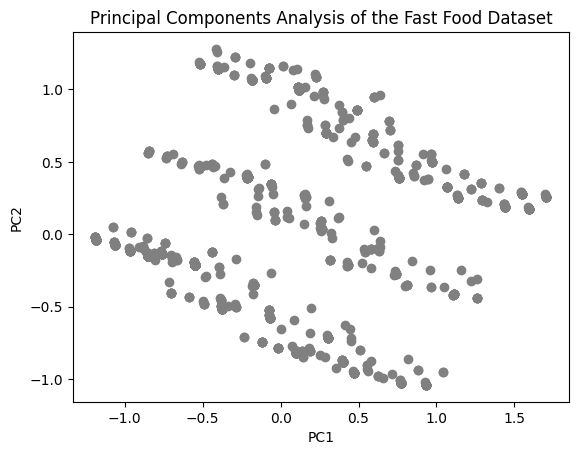

In [13]:
# PCA dimensionality reduction technique
pca_transformed = pca.transform(MD_x)
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components Analysis of the Fast Food Dataset')
plt.show()


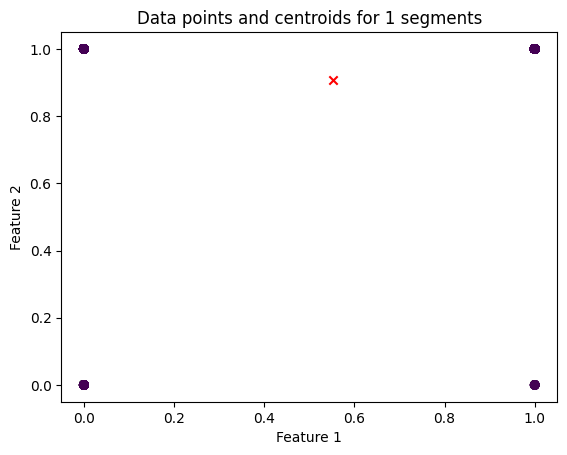

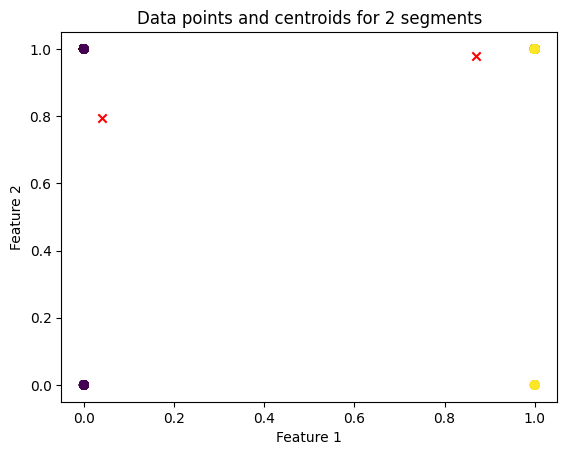

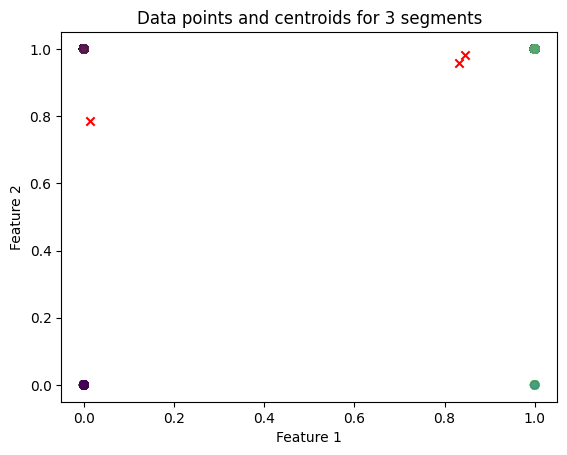

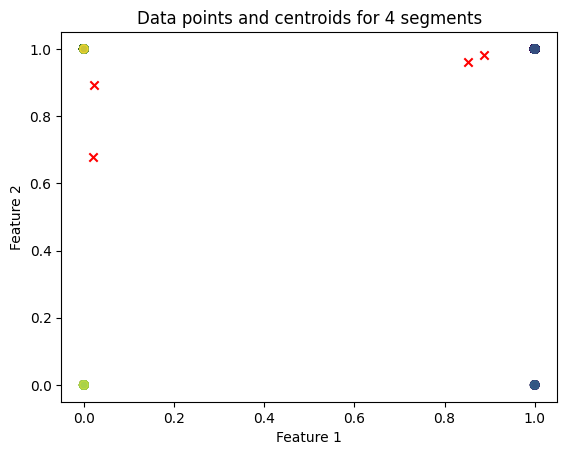

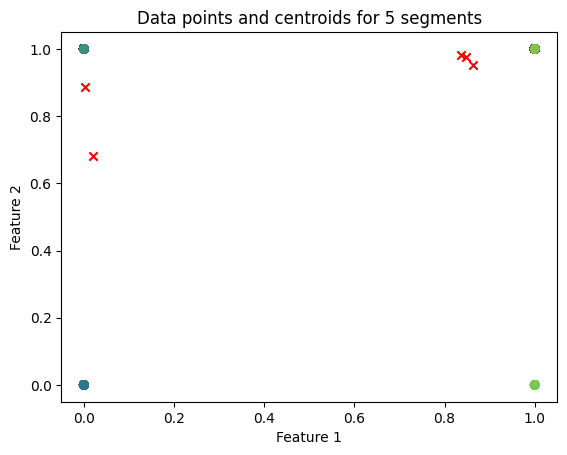

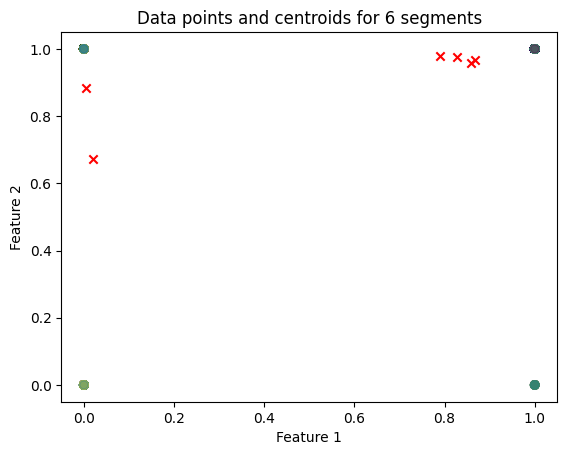

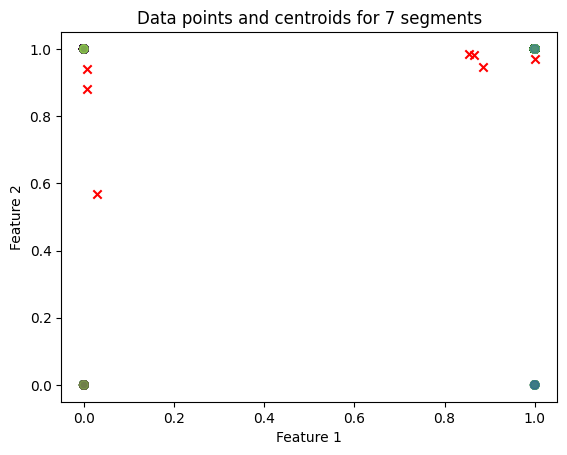

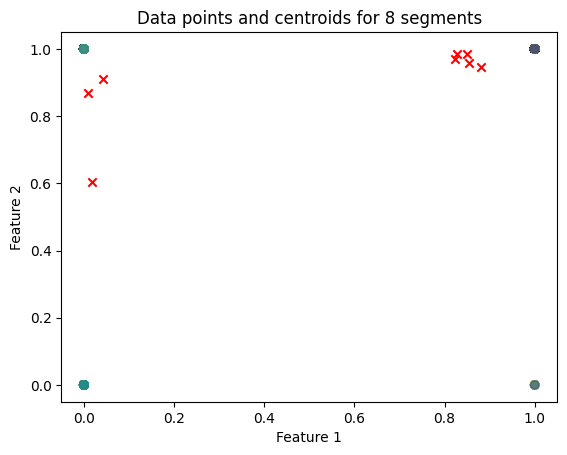

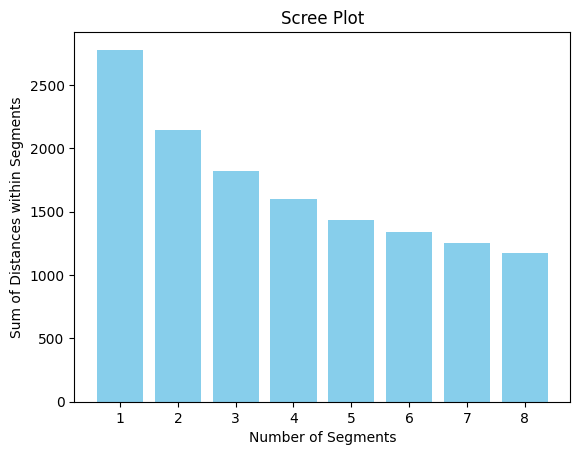

Optimal number of segments: 8


In [14]:
 
segmentations = {}
sum_distances = []

for n_segments in range(1, 9):
    kmeans = KMeans(n_clusters=n_segments, n_init=10)
    labels = kmeans.fit_predict(MD_x)
    segmentations[n_segments] = labels
    sum_distance = kmeans.inertia_  # Calculate sum of distances within segments
    sum_distances.append(round(sum_distance, 4))  # Round to four digits
    
    # Plot the data points and centroids for each segmentation
    plt.scatter(MD_x.iloc[:, 0], MD_x.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title('Data points and centroids for {} segments'.format(n_segments))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot a bar plot to visualize the sum of distances within market segments for each number of segments
plt.bar(range(1,9 ), sum_distances, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances within Segments')
plt.title('Scree Plot')
plt.show()
#Find the "elbow" point using the elbow method
x = range(1, 9)
y = sum_distances

# Compute the first derivative of the sum of distances
derivatives = np.gradient(y)

# Find the index of the maximum value of the second derivative (the "elbow" point)
elbow_index = np.argmax(derivatives)

# The optimal number of clusters is the index of the elbow point + 1
optimal_segments = elbow_index + 1
print("Optimal number of segments:", optimal_segments)


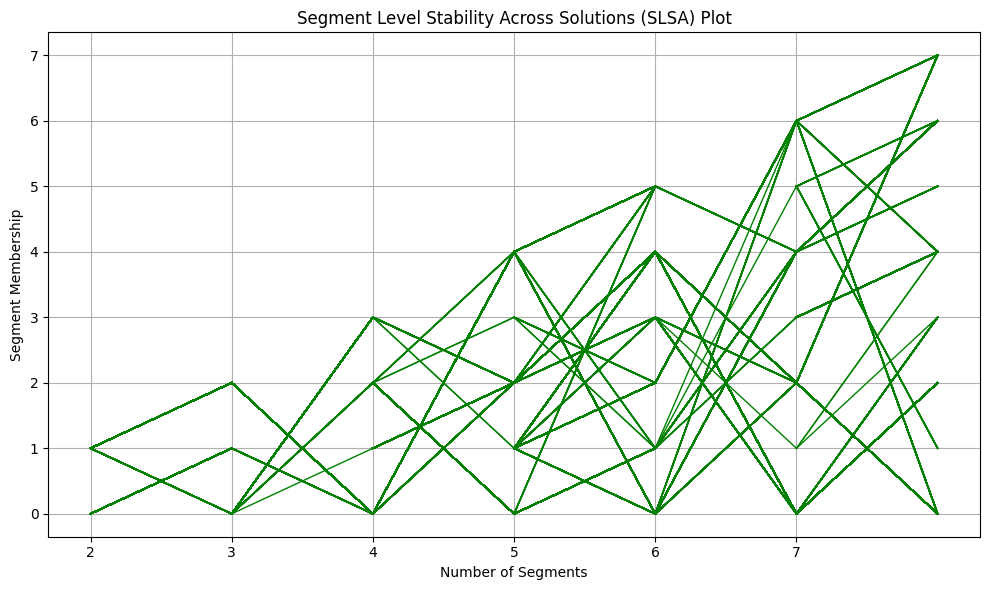

In [15]:

# Perform clustering for different numbers of segments
segmentations = {}
for n_segments in range(2, 9):  # Assuming you want to explore solutions with 2 to 8 segments
    kmeans = KMeans(n_clusters=n_segments, n_init=10)
    labels = kmeans.fit_predict(MD_x)
    segmentations[n_segments] = labels

# Plot the SLSA plot
num_solutions = len(segmentations)

plt.figure(figsize=(10, 6))

# Plot lines indicating segment membership changes across solutions
for i in range(num_solutions - 1):
    curr_segments = segmentations[i + 2]  # Segments for current solution
    next_segments = segmentations[i + 3]  # Segments for next solution
    for curr_seg, next_seg in zip(curr_segments, next_segments):
        if curr_seg != next_seg:
            plt.plot([i + 2, i + 3], [curr_seg, next_seg], color='green', linewidth=1)

# Customize plot
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xlabel('Number of Segments')
plt.ylabel('Segment Membership')
plt.xticks(range(2, num_solutions + 1))
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [16]:
MD_k4 = segmentations[4]
MD_k4

array([0, 3, 3, ..., 3, 1, 2])

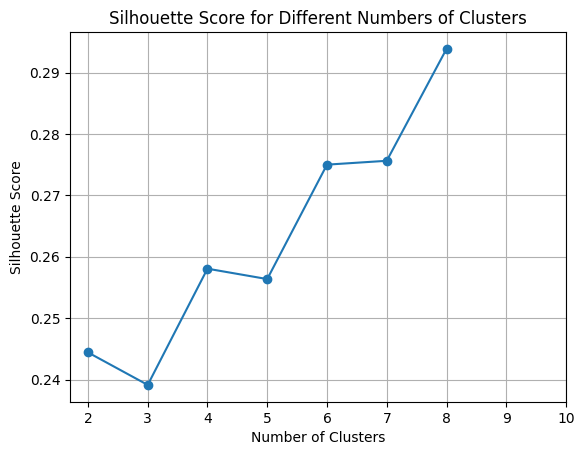

In [17]:

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette score for different numbers of clusters
for n_clusters in range(2, 9):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    labels = kmeans.fit_predict(MD_x)
    silhouette_avg = silhouette_score(MD_x, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2,9), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(np.arange(2, 11, step=1))
plt.grid(True)
plt.show()


In [18]:
silhouette_avg = silhouette_score(MD_x, labels)
silhouette_scores.append(silhouette_avg)


In [19]:
silhouette_avg

0.2938711990915676

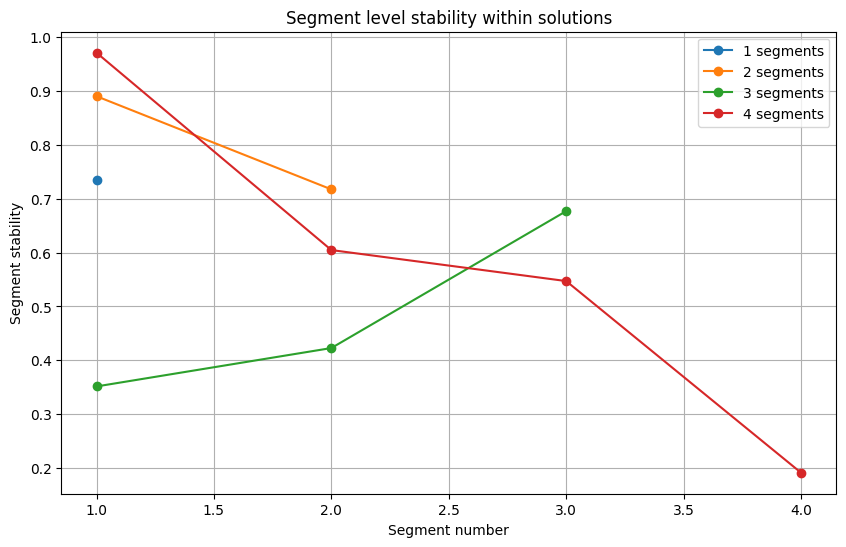

In [20]:
segment_stability = {n_segments: np.random.rand(n_segments) for n_segments in range(1, 5)}

# Plot segment stability
plt.figure(figsize=(10, 6))
for n_segments, stability in segment_stability.items():
    plt.plot(range(1, n_segments + 1), stability, marker='o', label=f'{n_segments} segments')

plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment level stability within solutions')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture
 
 # Set the seed for reproducibility
np.random.seed(1234)

# Perform Gaussian Mixture Model clustering for k = 2 to 8
k_range = range(1, 5)
n_rep = 10  # Number of repetitions

# Dictionary to store the results
cluster_results = {}

for k in k_range:
    # Initialize list to store the results for each repetition
    results = []
    
    for _ in range(n_rep):
        # Fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k)
        labels = gmm.fit_predict(MD_x)
        
        # Store the clustering results
        results.append(labels)
    
    # Store the results for the current number of clusters
    cluster_results[k] = results

# Print the results
for k, results in cluster_results.items():
    print(f'Number of clusters: {k}')
    for i, labels in enumerate(results):
        print(f'Replication {i + 1}: {labels}')


Number of clusters: 1
Replication 1: [0 0 0 ... 0 0 0]
Replication 2: [0 0 0 ... 0 0 0]
Replication 3: [0 0 0 ... 0 0 0]
Replication 4: [0 0 0 ... 0 0 0]
Replication 5: [0 0 0 ... 0 0 0]
Replication 6: [0 0 0 ... 0 0 0]
Replication 7: [0 0 0 ... 0 0 0]
Replication 8: [0 0 0 ... 0 0 0]
Replication 9: [0 0 0 ... 0 0 0]
Replication 10: [0 0 0 ... 0 0 0]
Number of clusters: 2
Replication 1: [1 1 1 ... 1 1 0]
Replication 2: [1 1 1 ... 1 0 1]
Replication 3: [0 1 1 ... 1 1 0]
Replication 4: [1 1 1 ... 1 0 1]
Replication 5: [0 1 1 ... 1 1 0]
Replication 6: [1 0 0 ... 0 0 1]
Replication 7: [0 1 1 ... 1 1 0]
Replication 8: [1 0 0 ... 0 0 1]
Replication 9: [1 0 0 ... 0 0 1]
Replication 10: [0 1 1 ... 1 1 0]
Number of clusters: 3
Replication 1: [0 1 1 ... 1 2 0]
Replication 2: [2 1 0 ... 0 1 0]
Replication 3: [0 2 2 ... 2 1 0]
Replication 4: [2 0 2 ... 0 1 2]
Replication 5: [2 1 0 ... 0 1 0]
Replication 6: [0 1 0 ... 1 2 0]
Replication 7: [1 2 2 ... 2 0 1]
Replication 8: [0 2 1 ... 1 2 1]
Replicat

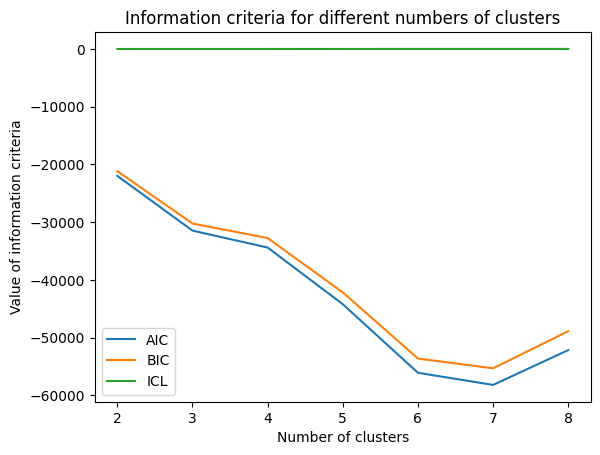

In [22]:
from sklearn.mixture import GaussianMixture
import numpy as np
# Fit Gaussian Mixture Models for different numbers of clusters
aic_values = []
bic_values = []
icl_values = []

for n_clusters in range(2, 9):
    gmm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    icl_values.append(gmm.lower_bound_)

# Plot AIC, BIC, and ICL values
import matplotlib.pyplot as plt

plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.plot(range(2, 9), icl_values, label='ICL')
plt.xlabel('Number of clusters')
plt.ylabel('Value of information criteria')
plt.title('Information criteria for different numbers of clusters')
plt.legend()
plt.show()


In [23]:
from sklearn.mixture import GaussianMixture

# Train Gaussian Mixture Model
num_components = 4  # Number of components/clusters
gaussian_mixture_model = GaussianMixture(n_components=num_components)
gaussian_mixture_model.fit(MD_x)

# Predict cluster labels using trained model
mixture_labels = gaussian_mixture_model.predict(MD_x)


In [24]:

#  Predict cluster labels using trained model
mixture_labels = gaussian_mixture_model.predict(MD_x)

#  Display the predicted cluster labels
print("Predicted cluster labels:", mixture_labels)


Predicted cluster labels: [3 0 2 ... 2 1 2]


In [25]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming MD_k4 contains the cluster labels for KMeans and MD_m4 contains the cluster labels for Gaussian Mixture Model

# Extract cluster labels for KMeans and Gaussian Mixture Model
kmeans_labels = segmentations[4]  # Assuming segmentations is your dictionary containing KMeans clustering results
mixture_labels = gaussian_mixture_model.predict(MD_x)  # Assuming gaussian_mixture_model is your trained Gaussian Mixture Model

# Convert cluster labels to start from 0 instead of 1
kmeans_labels -= 1
mixture_labels -= 1

# Determine the number of unique labels in each set of cluster labels
num_kmeans_labels = len(np.unique(kmeans_labels))
num_mixture_labels = len(np.unique(mixture_labels))

# Create contingency table
contingency_table = np.zeros((num_kmeans_labels, num_mixture_labels), dtype=int)
for kmeans_label, mixture_label in zip(kmeans_labels, mixture_labels):
    contingency_table[kmeans_label, mixture_label] += 1

# Display contingency table
print(contingency_table)


[[389   0   0 191]
 [  1 142  84   3]
 [  2 253   0  56]
 [ 69   0 192  71]]


In [26]:

# Set the seed for reproducibility
np.random.seed(1234)

# Fit mixture models with varying numbers of components
models = {}
for n_components in range(2, 9):
    model = GaussianMixture(n_components=n_components, n_init=10)
    model.fit(MD_x)
    models[n_components] = model

# Display model information
for n_components, model in models.items():
    print(f"Number of components: {n_components}")
    print(f"Log likelihood: {model.lower_bound_}")
    print(f"AIC: {model.aic(MD_x)}")
    print(f"BIC: {model.bic(MD_x)}")
    print("")


Number of components: 2
Log likelihood: 7.672278681921454
AIC: -21985.641849663745
BIC: -21167.027071810353

Number of components: 3
Log likelihood: 11.078578848691944
AIC: -31728.350134298787
BIC: -30497.78727468691

Number of components: 4
Log likelihood: 14.12039480944893
AIC: -40411.87970683143
BIC: -38769.36876546107

Number of components: 5
Log likelihood: 16.520265726365
AIC: -47229.89220081669
BIC: -45175.43317768785

Number of components: 6
Log likelihood: 18.172335295106258
AIC: -51874.81514663252
BIC: -49408.4080417452

Number of components: 7
Log likelihood: 18.203563599142456
AIC: -51809.97746232207
BIC: -48931.62227567627

Number of components: 8
Log likelihood: 17.138547978439423
AIC: -48558.620425277244
BIC: -45268.31715687296



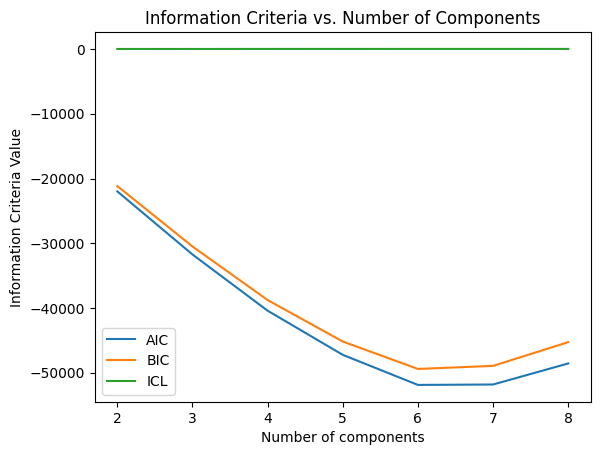

In [27]:
 
# Extract AIC, BIC, and ICL values from Gaussian Mixture Models
aic_values = [model.aic(MD_x) for model in models.values()]
bic_values = [model.bic(MD_x) for model in models.values()]
icl_values = [model.lower_bound_ for model in models.values()]

# Plot AIC, BIC, and ICL values
plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.plot(range(2, 9), icl_values, label='ICL')
plt.xlabel('Number of components')
plt.ylabel('Information Criteria Value')
plt.title('Information Criteria vs. Number of Components')
plt.legend()
plt.show()



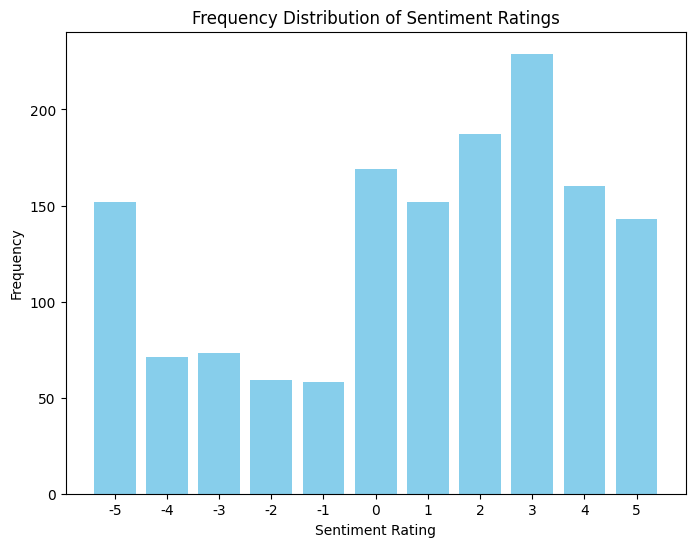

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like.n, dtype: int64


In [29]:

# Preprocess the 'Like' column to extract numeric ratings
mcdonalds['Like.n'] = mcdonalds['Like'].str.extract(r'([-+]?\d+)').astype(int)

# Generate a frequency table of the transformed ratings
transformed_freq = mcdonalds['Like.n'].value_counts().sort_index()

# Plot the frequency distribution of sentiment ratings
plt.figure(figsize=(8, 6))
plt.bar(transformed_freq.index.astype(str), transformed_freq.values, color='skyblue')
plt.xlabel('Sentiment Rating')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Sentiment Ratings')
plt.show()

# Display the frequency table of transformed ratings
print(transformed_freq)


In [30]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [31]:
import patsy

# Replace 'Like.n' with the correct column name if necessary
formula_string = "yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting"

# Convert the string to a formula object
formula = patsy.dmatrix(formula_string, data=mcdonalds)

# Display the formula object
print(formula)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [32]:
 
# Fit the model to the data
gaussian_mixture_model.fit(formula)  # Assuming 'formula' is the design matrix created using Patsy

# Extract cluster labels
cluster_labels =gaussian_mixture_model.predict(formula)

# Display cluster sizes
cluster_sizes = np.bincount(cluster_labels)
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i+1}: {size}")


Cluster sizes:
Cluster 1: 322
Cluster 2: 469
Cluster 3: 63
Cluster 4: 599


In [125]:

# Get the means, standard deviations, and weights of each component
means = gaussian_mixture_model.means_
covariances = gaussian_mixture_model.covariances_
weights = gaussian_mixture_model.weights_

# Print summary statistics for each component
for i in range(len(means)):
    print(f"Component {i+1}:")
    print("Mean:", means[i])
    print("Standard Deviation (Covariance Matrix):", covariances[i])
    print("Weight:", weights[i])
    print()


Component 1:
Mean: [1.         0.75675669 0.94932433 0.13851349 0.88175673 0.5472973
 0.85135134 0.         0.86486479 1.         0.20945944 0.14864867]
Standard Deviation (Covariance Matrix): [[ 1.00000000e-06  2.97155355e-31  3.57119440e-31  4.53061976e-32
   4.45066765e-31  2.26864122e-31  4.24412469e-31  0.00000000e+00
   4.23246501e-31  4.43734259e-31  1.06602818e-31  6.59604936e-32]
 [ 3.00486693e-31  1.84077000e-01  7.94375088e-03 -4.73885947e-02
   1.17786883e-02 -5.38714983e-03 -2.37398929e-03  0.00000000e+00
   4.14536646e-02  3.00486693e-31  2.73933781e-04 -4.83016971e-02]
 [ 3.55786905e-31  7.94375088e-03  4.81086485e-02 -3.11587003e-03
   1.08998336e-02 -9.42750114e-03  9.35902004e-03  0.00000000e+00
   3.28706707e-03  3.55786905e-31  4.79363260e-04 -5.98064154e-03]
 [ 3.99760567e-32 -4.73885947e-02 -3.11587003e-03  1.19328506e-01
  -1.40271150e-02  2.21648949e-02 -3.05880199e-03  0.00000000e+00
  -3.53360008e-02  3.99760567e-32  4.77081413e-03  1.99506832e-02]
 [ 4.450667

In [36]:
 
# Create a dictionary to store the summary statistics
summary_dict = {
    'Component': [],
    'Mean': [],
    'Standard Deviation (Covariance Matrix)': [],
    'Weight': []
}

# Populate the dictionary with summary statistics for each component
for i in range(len(means)):
    summary_dict['Component'].append(i + 1)
    summary_dict['Mean'].append(means[i])
    summary_dict['Standard Deviation (Covariance Matrix)'].append(covariances[i])
    summary_dict['Weight'].append(weights[i])

# Create a DataFrame from the dictionary
summary_df = pd.DataFrame(summary_dict)

# Print the DataFrame
print(summary_df)


   Component                                               Mean  \
0          1  [1.0000000000000027, 0.7795041480262396, 0.941...   
1          2  [1.0000000000000033, 0.0, 0.778075144070073, 0...   
2          3  [1.0000000000000013, 0.8571427796612285, 0.825...   
3          4  [1.0000000000000027, 0.8308737650572653, 1.000...   

              Standard Deviation (Covariance Matrix)    Weight  
0  [[1e-06, 6.105009968551467e-30, 7.126389770712...  0.221658  
1  [[1e-06, 0.0, 8.638924705054073e-30, 7.4740502...  0.322524  
2  [[1e-06, 1.4180708437130993e-30, 1.37111485551...  0.043359  
3  [[1e-06, 6.1918555356841855e-30, 7.09974814698...  0.412460  


In [37]:
mcdonalds.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [ ]:
mcdonalds.columns

<Figure size 800x600 with 0 Axes>

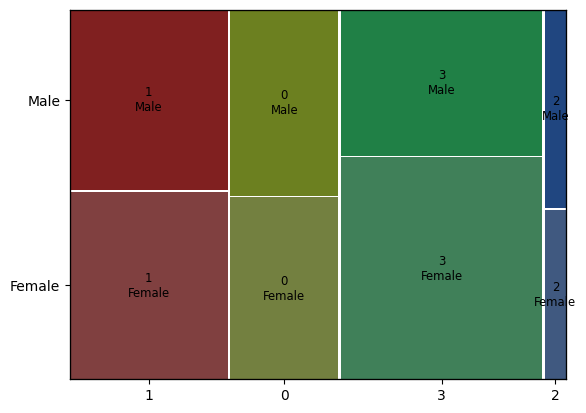

In [60]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a DataFrame containing 'k4' and 'Gender' columns
data = pd.DataFrame({'cluster_labels': cluster_labels, 'Gender': mcdonalds['Gender']})

# Create a mosaic plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
mosaic(data, ['cluster_labels', 'Gender'], title='')  # You can adjust other parameters as needed
plt.show()


<Figure size 1200x800 with 0 Axes>

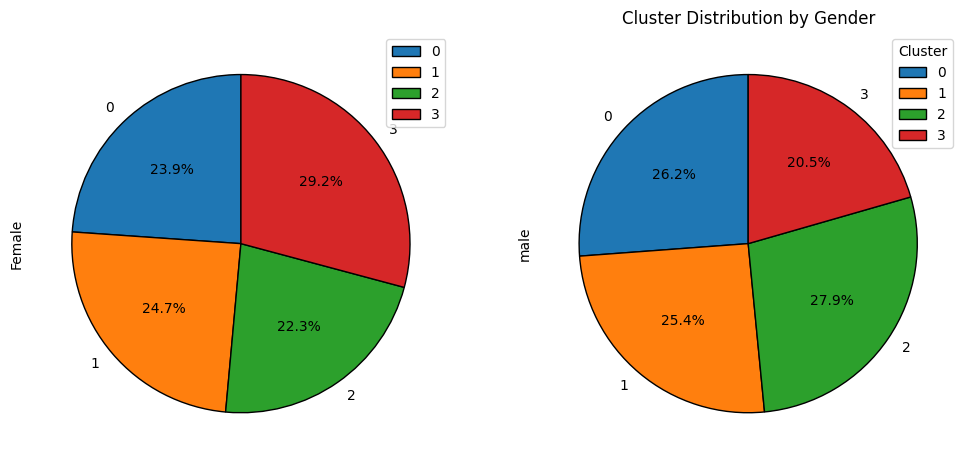

In [126]:
# Calculate the proportions of each gender within each cluster
cluster_gender_counts = data.groupby(['cluster_labels', 'Gender']).size().unstack()
cluster_gender_proportions = cluster_gender_counts.div(cluster_gender_counts.sum(axis=1), axis=0)

# Plot the pie chart
plt.figure(figsize=(12, 8))
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}  # Define wedge properties
cluster_gender_proportions.plot(kind='pie', subplots=True, figsize=(12, 8), autopct='%1.1f%%', startangle=90,
                                wedgeprops=wedgeprops)  # Add wedgeprops parameter
plt.title('Cluster Distribution by Gender')
plt.ylabel('male')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()


<Figure size 1000x600 with 0 Axes>

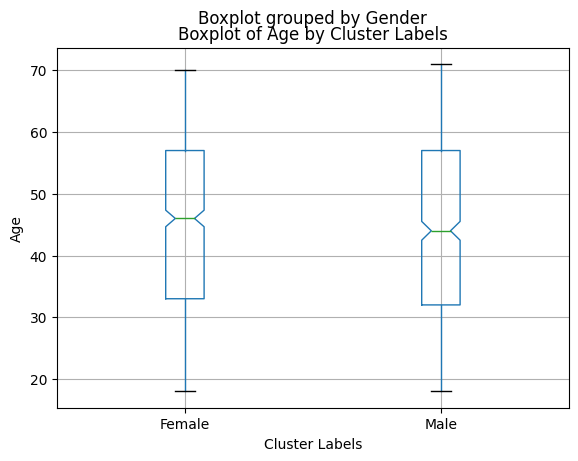

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
mcdonalds.boxplot(column='Age', by= 'Gender', notch=True)
plt.title('Boxplot of Age by Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Age')
plt.show()


In [46]:
from sklearn.tree import DecisionTreeClassifier


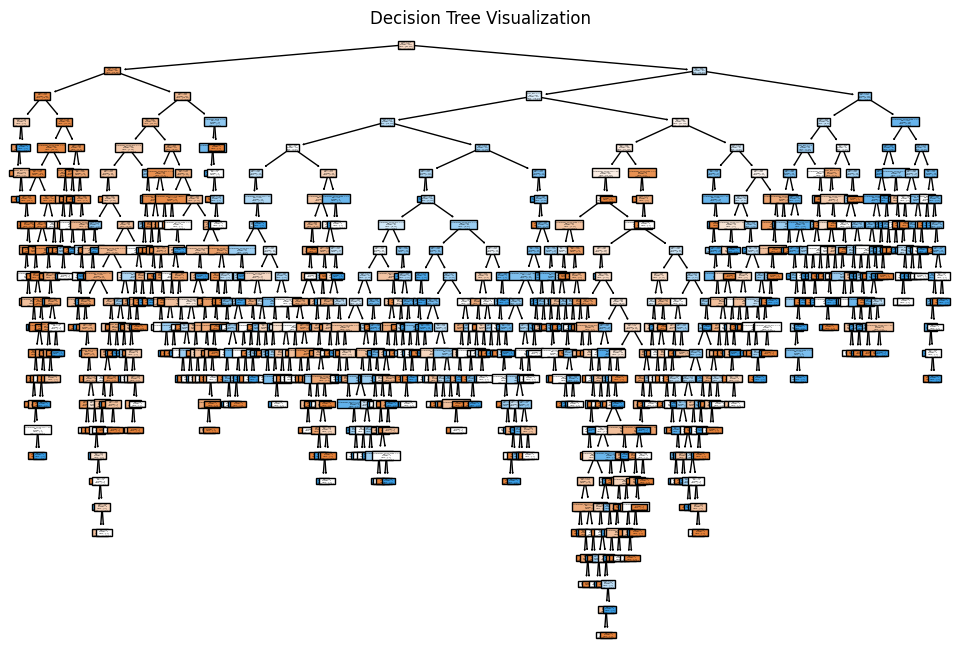

In [51]:
from sklearn.tree import plot_tree

# Convert Index object to list
feature_names = list(X_encoded.columns)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [76]:
mcdonalds['cluster_labels'] = cluster_labels


In [100]:
# Calculate the mean of 'VisitFrequency' for each cluster label
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n,cluster_labels,VisitFrequencyNumeric
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3,3,4.0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2,1,4.0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1,0,4.0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4,1,16.0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2,1,1.0


In [96]:
# Map visit frequency strings to corresponding numeric values
frequency_mapping = {
    'Every three months': 4,
    'Once a week': 4 * 4,  # Assuming this is approximately 4 times a month
    'Once a month': 1,
    'More than once a week': 4 * 4,  # Assuming this is approximately 4 times a week
    'Once a year': 1/12,  # Assuming this is approximately once in 12 months
    'Never': 0
}

# Convert the 'VisitFrequency' column to numeric using the mapping
mcdonalds['VisitFrequencyNumeric'] = mcdonalds['VisitFrequency'].map(frequency_mapping)

# Now you can use 'VisitFrequencyNumeric' column for calculations



In [110]:
 mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n,cluster_labels,VisitFrequencyNumeric
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3,3,4.0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2,1,4.0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1,0,4.0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4,1,16.0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2,1,1.0


In [104]:
import pandas as pd

# Assuming you have a DataFrame named mcdonalds with columns 'Gender' and 'cluster_labels'
# Assuming k4 is the cluster label

# Convert Gender to binary (0 for Male, 1 for Female) and calculate the mean for each cluster
female_mean = mcdonalds['Gender'].eq('Female').groupby(mcdonalds['cluster_labels']).mean()

print(female_mean)


cluster_labels
0    0.462838
1    0.565097
2    0.606218
3    0.519512
Name: Gender, dtype: float64


In [ ]:
import seaborn as sns

# Plot the decision tree as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(np.array([tree.tree_.feature, tree.tree_.threshold]).T, annot=True, fmt=".2f",
            xticklabels=X_encoded.columns, yticklabels=False, cmap='viridis')
plt.title("Decision Tree Visualization")
plt.xlabel("Feature")
plt.ylabel("Node")
plt.show()


<Figure size 1000x600 with 0 Axes>

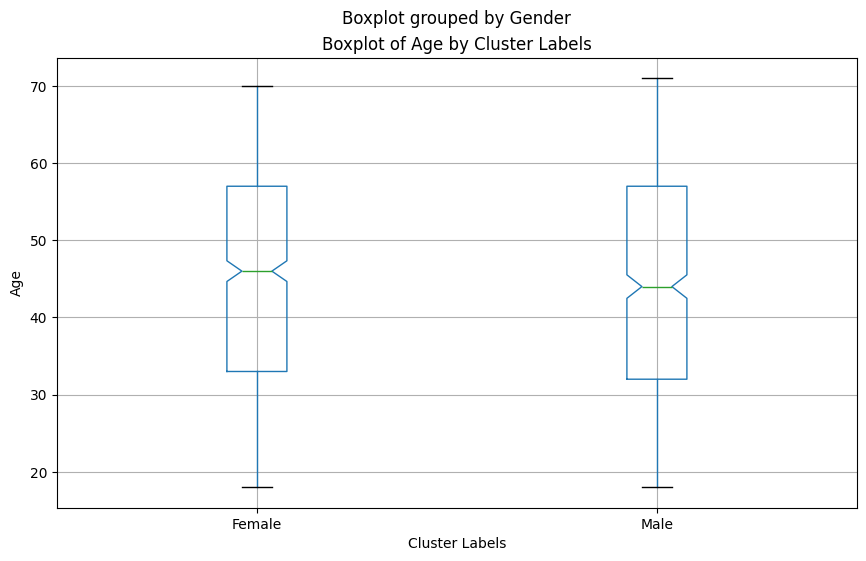

In [119]:
import matplotlib.pyplot as plt

# Assuming 'cluster_labels' contains the cluster labels and 'mcdonalds' is your DataFrame
plt.figure(figsize=(10, 6))
mcdonalds.boxplot(column='Age', by='Gender', figsize=(10, 6),  notch=True)
plt.title('Boxplot of Age by Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Age')
plt.show()


In [120]:
# Check the data types of all columns in the DataFrame
mcdonalds.dtypes


yummy                     object
convenient                object
spicy                     object
fattening                 object
greasy                    object
fast                      object
cheap                     object
tasty                     object
expensive                 object
healthy                   object
disgusting                object
Like                      object
Age                        int64
VisitFrequency            object
Gender                    object
Like.n                     int32
cluster_labels             int64
VisitFrequencyNumeric    float64
dtype: object

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import warnings

# Load the dataset
mcdonalds = pd.read_csv(r'C:\Users\Aravind kumaran\Downloads\McDonalds Case Study-20240407T082614Z-001\McDonalds Case Study\mcdonalds.csv')

# Preprocess the 'Like' column to extract numeric ratings
mcdonalds['Like.n'] = mcdonalds['Like'].str.extract(r'([-+]?\d+)').astype(int)

# Define the features
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Extract the features and target variable
X = mcdonalds[features]
y = mcdonalds['cluster_labels']

# Perform PCA
pca = PCA()
pca.fit(X)
pca_transformed = pca.transform(X)

# Plot PCA
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Dataset')
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, n_init=10)
gmm_labels = gmm.fit_predict(X)

# Calculate silhouette scores
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_gmm = silhouette_score(X, gmm_labels)

print("Silhouette Score (KMeans):", silhouette_kmeans)
print("Silhouette Score (GMM):", silhouette_gmm)

# Visualize cluster distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gaussian Mixture Model Clustering')

plt.show()


KeyError: 'cluster_labels'